In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv("winequality.csv")

In [20]:
msk = np.random.rand(len(df)) < 0.3
msk

array([ True, False,  True, ..., False, False,  True])

In [18]:
msk = np.random.rand(len(df)) < 0.3
train = df[~msk]
test = df[msk]
len(train), len(test)

(1126, 473)

In [21]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TARGET
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1580,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  TARGET                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
cols = df.columns
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'TARGET'],
      dtype='object')

In [9]:
cols = [col.replace(" ", "_") for col in cols]
cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'TARGET']

In [10]:
df.columns = cols
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,TARGET
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
len(df.columns)

12

In [12]:
df.to_csv("winequality_processed.csv", index=False, sep=",")

# 1. Data analysis

## 1.1 Target distribution

In [13]:
df["TARGET"].sort_values().unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

<AxesSubplot:>

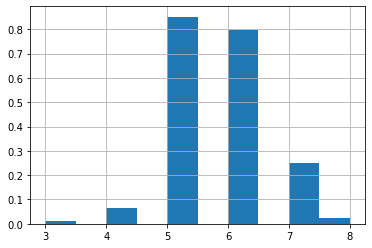

In [14]:
df["TARGET"].hist(density=True)

Gaussian

## 1.2 Identify Categorical

In [15]:
cat_vars = [var for var in df.columns if df[var].dtype == 'O']
len(cat_vars)

0

## 1.3 Identify Numericals

In [16]:
num_vars = [var for var in df.columns if var not in cat_vars and var != "TARGET"]
len(num_vars)

11

Only numerical vars in this dataset

## 1.4 Check for missing values

In [17]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
TARGET                  0
dtype: int64

no null values

## 1.5 Visualize variables

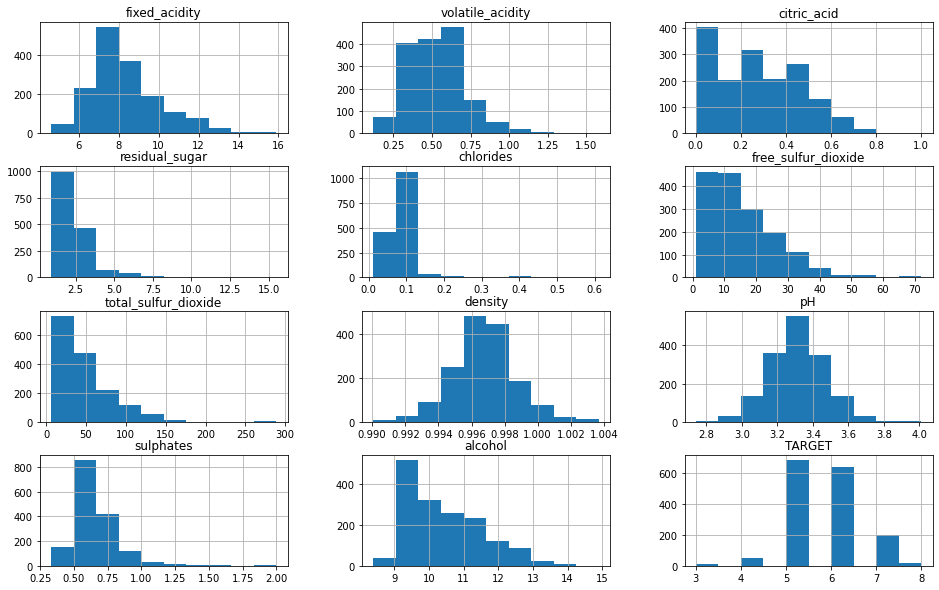

In [18]:
df.hist(bins=10, figsize=(16,10))
plt.show()

<AxesSubplot:xlabel='TARGET', ylabel='count'>

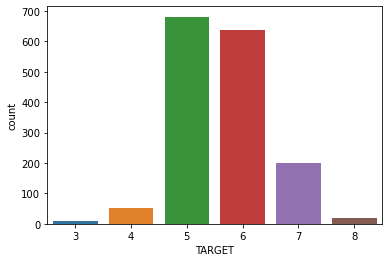

In [19]:
sns.countplot(data=df, x="TARGET")

Most samples have quality 5,6,7

In [20]:
corr = df.corr()["TARGET"].sort_values(ascending=False)
corr

TARGET                  1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: TARGET, dtype: float64

Best correlation to the target: alcohol, sulphates, citric_acid, fixed_acidity, residual_sugar

<AxesSubplot:>

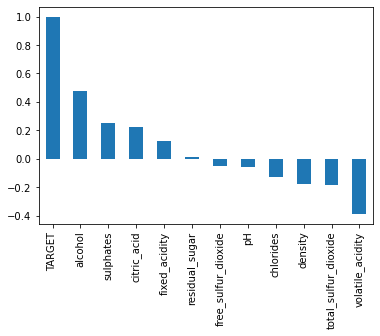

In [21]:
corr.plot(kind="bar")

<AxesSubplot:>

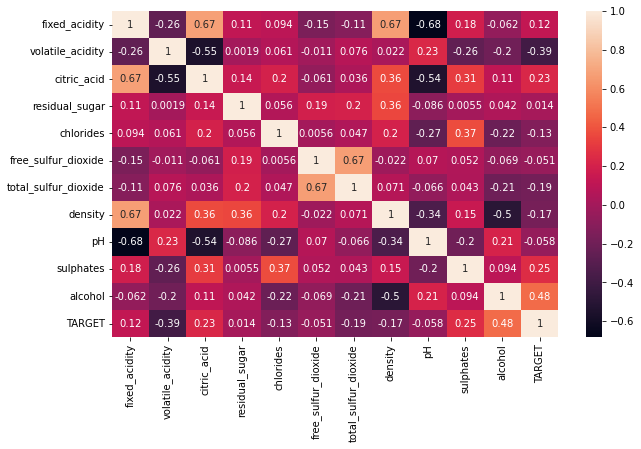

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True)

In [23]:
abs(corr) > 0.2

TARGET                   True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: TARGET, dtype: bool

Best variables with corr threshold 0.2

<AxesSubplot:xlabel='TARGET', ylabel='alcohol'>

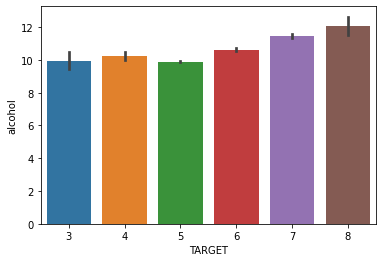

In [24]:
sns.barplot(data=df, x="TARGET", y="alcohol")

The more alcohol, the better the rating (quality)

<AxesSubplot:xlabel='TARGET', ylabel='sulphates'>

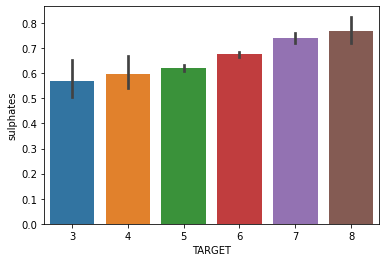

In [25]:
sns.barplot(data=df, x="TARGET", y="sulphates")

<AxesSubplot:xlabel='TARGET', ylabel='citric_acid'>

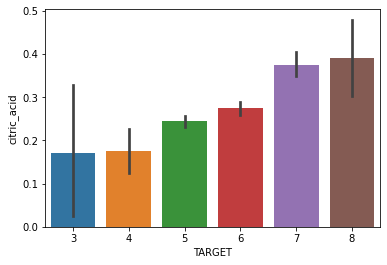

In [26]:
sns.barplot(data=df, x="TARGET", y="citric_acid")

For all variables: the more the better the quality

<AxesSubplot:xlabel='TARGET', ylabel='volatile_acidity'>

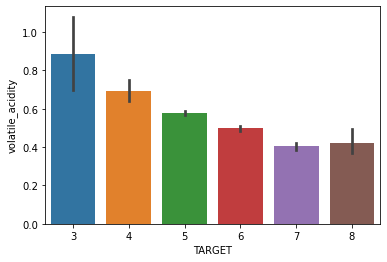

In [27]:
sns.barplot(data=df, x="TARGET", y="volatile_acidity")

Opposite for volatile acidity

# 2. Feature Engineering

In [28]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

## 2.1. Scaling

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
joblib.dump(scaler, "minmax_scaler_wine.joblib")

['minmax_scaler_wine.joblib']

In [34]:
X_train.to_csv("X_train.csv", index=False, sep=",")
X_test.to_csv("X_test.csv", index=False, sep=",")
X_train_scaled.to_csv("X_train_scaled.csv", index=False, sep=",")
X_test_scaled.to_csv("X_test_scaled.csv", index=False, sep=",")
y_train.to_csv("y_train.csv", index=False, sep=",")
y_test.to_csv("y_test.csv", index=False, sep=",")

# 3. Feature selection

In [35]:
filtered_features = corr.apply(lambda x: abs(x)>0.2)
selected_features = corr[filtered_features]
selected_features = pd.DataFrame(selected_features).reset_index().drop("TARGET", axis=1).drop(0, axis=0)
selected_features.head()

,index
1,alcohol
2,sulphates
3,citric_acid
4,volatile_acidity


The same as above

In [36]:
selected_features.to_csv("selected_features.csv", index=False, sep=",")

In [37]:
X_train_scaled = X_train_scaled[selected_features.values.flatten().tolist()]
X_train_scaled.head()

,alcohol,sulphates,citric_acid,volatile_acidity
0,0.226415,0.182390,0.166667,0.280822
1,0.735849,0.270440,0.576923,0.136986
2,0.396226,0.050314,0.384615,0.095890
3,0.415094,0.408805,0.602564,0.095890
4,0.188679,0.132075,0.435897,0.260274


In [38]:
X_test_scaled = X_test_scaled[selected_features.values.flatten().tolist()]
X_test_scaled.head()

,alcohol,sulphates,citric_acid,volatile_acidity
0,0.245283,0.088050,0.128205,0.452055
1,0.169811,0.088050,0.051282,0.414384
2,0.056604,0.119497,0.423077,0.253425
3,0.679245,0.075472,0.871795,0.123288
4,0.528302,0.081761,0.500000,0.126712


# 4. Model selection

In [39]:
models = [
    Lasso(alpha=0.001, random_state=101),
    Ridge(alpha=0.001, random_state=101),
    ElasticNet(alpha=0.001, random_state=101),
    DecisionTreeRegressor(random_state=101),
    RandomForestRegressor(n_estimators=10, random_state=101),
    LinearRegression()
]

In [40]:
def score_models(X_train, X_test, y_train, y_test, models):
    model_results = list()
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        df1 = pd.DataFrame(
            {
                "model": [model.__class__.__name__],
                "MAE": [mean_absolute_error(y_test, predictions)],
                "MSE": [mean_squared_error(y_test, predictions)],
                "RMSE": [np.sqrt(mean_squared_error(y_test, predictions))],
                "R2": [r2_score(y_test, predictions)],
                "EVS": [explained_variance_score(y_test, predictions)]
            }
        ).set_index("model")
        plt.figure()
        plt.scatter(y_test, predictions)
        plt.title(model.__class__.__name__)
        model_results.append(df1)
        
    return pd.concat(model_results, axis=0) # faster than "append" in loop

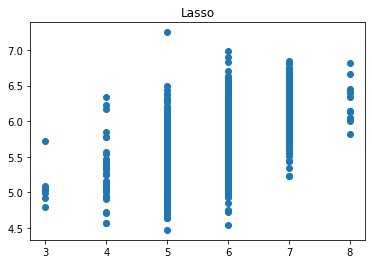

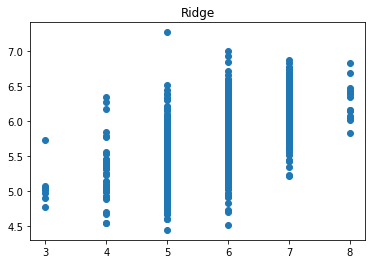

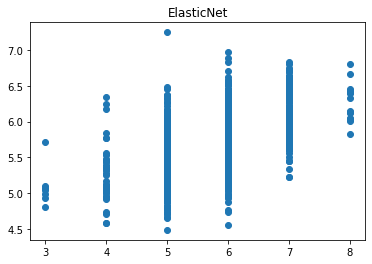

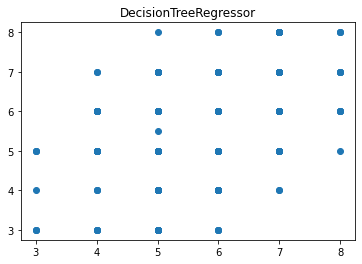

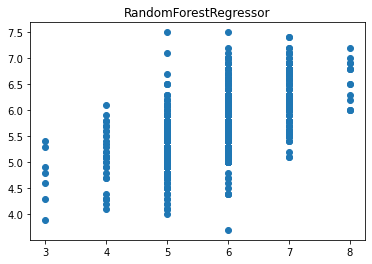

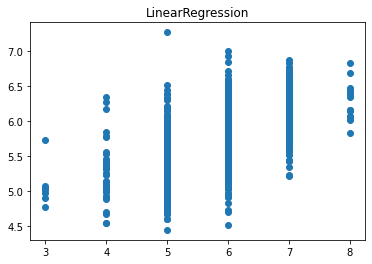

In [41]:
model_results = score_models(X_train_scaled, X_test_scaled, y_train, y_test, models)

In [42]:
model_results.head()

,MAE,MSE,RMSE,R2,EVS
model,,,,,
Lasso,0.523623,0.446284,0.668045,0.330225,0.330682
Ridge,0.522912,0.446220,0.667997,0.330321,0.330777
ElasticNet,0.523747,0.446411,0.668140,0.330035,0.330493
DecisionTreeRegressor,0.573661,0.768080,0.876402,-0.152721,-0.152613
RandomForestRegressor,0.518673,0.457776,0.676591,0.312978,0.313548


In [43]:
y_train.median() # average wine quality

6.0

In [44]:
model_results.idxmin()

MAE     RandomForestRegressor
MSE          LinearRegression
RMSE         LinearRegression
R2      DecisionTreeRegressor
EVS     DecisionTreeRegressor
dtype: object

## 4.1. Finding best model parameters using GridSearch

In [45]:
models = [
    Lasso(),
    Ridge(),
    ElasticNet(),
    RandomForestRegressor()
]

In [46]:
param_grid = {
    "alpha": np.arange(0, 1, 0.1).tolist(),
    "random_state": [101]
}

param_grid_forest = {
    "random_state": [101],
    "n_estimators": np.arange(0, 600, 10).tolist()
}

In [47]:
for model in models:
    if model.__class__.__name__ == "RandomForestRegressor":
        grid = GridSearchCV(estimator=model, param_grid=param_grid_forest, verbose=2)
        grid.fit(X_train_scaled, y_train)
    else:
        grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
        grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................alpha=0.0, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.0, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.0, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.0, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.0, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.1, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.1, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.1, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.1, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.1, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.2, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.2, rand

C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e+01, tolerance: 2.313e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented 

[CV] END .........alpha=0.6000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.7000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.7000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.7000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.7000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.7000000000000001, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.8, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.8, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.8, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.8, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.8, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.9, random_state=101; total time=   0.0s
[CV] END ...................

C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.658e+01, tolerance: 2.955e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sk

[CV] END ........................alpha=0.4, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.4, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.4, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.4, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.5, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.5, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.5, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.5, random_state=101; total time=   0.0s
[CV] END ........................alpha=0.5, random_state=101; total time=   0.0s
[CV] END .........alpha=0.6000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.6000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.6000000000000001, random_state=101; total time=   0.0s
[CV] END .........alpha=0.60

C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.658e+01, tolerance: 2.955e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sk

[CV] END ..................n_estimators=20, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=20, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=30, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=30, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=30, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=30, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=30, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=40, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=40, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=40, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=40, random_state=101; total time=   0.0s
[CV] END ..................n_estimators=40, random_state=101; total time=   0.0s
[CV] END ..................n

C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py", line 384, in fit
    self._validate_estimator()
  File "C:\Users\Daniel\anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_esti

In [48]:
grid.best_params_

{'n_estimators': 330, 'random_state': 101}

In [49]:
grid.best_estimator_

RandomForestRegressor(n_estimators=330, random_state=101)

In [50]:
grid_predictions = grid.predict(X_test_scaled)

In [51]:
mean_absolute_error(y_test, grid_predictions), mean_squared_error(y_test, grid_predictions), np.sqrt(mean_squared_error(y_test, grid_predictions))

(0.5089480068542569, 0.43336792456719064, 0.6583068620082816)

In [52]:
model_results.head()

,MAE,MSE,RMSE,R2,EVS
model,,,,,
Lasso,0.523623,0.446284,0.668045,0.330225,0.330682
Ridge,0.522912,0.446220,0.667997,0.330321,0.330777
ElasticNet,0.523747,0.446411,0.668140,0.330035,0.330493
DecisionTreeRegressor,0.573661,0.768080,0.876402,-0.152721,-0.152613
RandomForestRegressor,0.518673,0.457776,0.676591,0.312978,0.313548


### Summary
- Pick Random Forest Regressor with n_estimator=330

# 5. Train model and save it

In [53]:
model = RandomForestRegressor(n_estimators=330, random_state=101)
model.fit(X_train_scaled, y_train)
joblib.dump(model, "random_forest_regressor.joblib")

['random_forest_regressor.joblib']

# 6. Pipeline

In [54]:
from sklearn.pipeline import Pipeline

In [57]:
from typing import List
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ColNameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols: List[str]):
        if not isinstance(cols, list):
            raise ValueError("Columns should be a list")
        self.cols = cols

    def fit(self, X: pd.DataFrame, y: pd.Series = None):
        # do nothing
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        cols = X.columns
        cols = [col.replace(" ", "_") for col in cols]
        X.columns = cols
        return X


In [60]:
pipeline = Pipeline(
    [
        ("ColNameTransformer", ColNameTransformer(X_test_scaled.columns.to_list())),
        ("MinMaxScaler", MinMaxScaler()),
        ("RandomForestRegressor", RandomForestRegressor(
            n_estimators=330,
            random_state=101
        ))
    ]
)

In [61]:
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('ColNameTransformer',
                 ColNameTransformer(cols=['alcohol', 'sulphates', 'citric_acid',
                                          'volatile_acidity'])),
                ('MinMaxScaler', MinMaxScaler()),
                ('RandomForestRegressor',
                 RandomForestRegressor(n_estimators=330, random_state=101))])

In [62]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'TARGET'],
      dtype='object')